In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
from sklearn.metrics import r2_score

In [46]:
df=pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [48]:
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [49]:
df.describe(include='all')

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
count,5512.000000,5512,5512,5512,5512,5512,5512,5512.000000,5512,5512
unique,NaN,1896,1300,2610,5,2,6,NaN,139,6
top,NaN,Maruti Alto 800 LXI,4.50 Lakh,"80,000 kms",Petrol,Manual,1st Owner,NaN,1197 cc,5 Seats
freq,NaN,53,62,163,2967,3962,3736,NaN,714,4673
mean,2755.500000,NaN,NaN,NaN,NaN,NaN,NaN,2015.455552,NaN,NaN
std,1591.321673,NaN,NaN,NaN,NaN,NaN,NaN,3.927974,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
25%,1377.750000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN
50%,2755.500000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,4133.250000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN


In [50]:
df.duplicated().sum()

0

In [51]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [52]:
df=df.drop(['Unnamed: 0'],axis=1)

In [53]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [54]:
df['Brand']=df['car_name'].apply(lambda x:x.split()[0])
df['Model']=df['car_name'].apply(lambda x:x.split()[1])

In [55]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Compass
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Duster
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Camry
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Jazz
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Polo


In [56]:
df['engine']=df['engine'].str.strip('cc')
df['Seats']=df['Seats'].str.strip('Seats')

In [57]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956,5,Jeep,Compass
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330,5,Renault,Duster
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494,5,Toyota,Camry
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199,5,Honda,Jazz
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199,5,Volkswagen,Polo


In [58]:
df=df.drop(['car_name'],axis=1)
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model
0,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956,5,Jeep,Compass
1,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330,5,Renault,Duster
2,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494,5,Toyota,Camry
3,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199,5,Honda,Jazz
4,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199,5,Volkswagen,Polo


In [59]:
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [60]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model
0,10.03 Lakh,86226 kms,Diesel,Manual,1st Owner,2017,1956,5,Jeep,Compass
1,12.83 Lakh,13248 kms,Petrol,Automatic,1st Owner,2021,1330,5,Renault,Duster
2,16.40 Lakh,60343 kms,Petrol,Automatic,1st Owner,2016,2494,5,Toyota,Camry
3,7.77 Lakh,26696 kms,Petrol,Automatic,1st Owner,2018,1199,5,Honda,Jazz
4,5.15 Lakh,69414 kms,Petrol,Manual,1st Owner,2016,1199,5,Volkswagen,Polo


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  5512 non-null   object
 1   kms_driven           5512 non-null   object
 2   fuel_type            5512 non-null   object
 3   transmission         5512 non-null   object
 4   ownership            5512 non-null   object
 5   manufacture          5512 non-null   int64 
 6   engine               5512 non-null   object
 7   Seats                5512 non-null   object
 8   Brand                5512 non-null   object
 9   Model                5512 non-null   object
dtypes: int64(1), object(9)
memory usage: 430.8+ KB


In [62]:
df['kms_driven']=df['kms_driven'].str.strip('kms')

In [63]:
df['kms_driven']=pd.to_numeric(df['kms_driven'])
df['engine']=pd.to_numeric(df['engine'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  5512 non-null   object
 1   kms_driven           5512 non-null   int64 
 2   fuel_type            5512 non-null   object
 3   transmission         5512 non-null   object
 4   ownership            5512 non-null   object
 5   manufacture          5512 non-null   int64 
 6   engine               5512 non-null   int64 
 7   Seats                5512 non-null   object
 8   Brand                5512 non-null   object
 9   Model                5512 non-null   object
dtypes: int64(3), object(7)
memory usage: 430.8+ KB


In [65]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model
0,10.03 Lakh,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,Compass
1,12.83 Lakh,13248,Petrol,Automatic,1st Owner,2021,1330,5,Renault,Duster
2,16.40 Lakh,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota,Camry
3,7.77 Lakh,26696,Petrol,Automatic,1st Owner,2018,1199,5,Honda,Jazz
4,5.15 Lakh,69414,Petrol,Manual,1st Owner,2016,1199,5,Volkswagen,Polo


In [66]:
df['ownership'].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

In [67]:
df['ownership']=np.where(df['ownership']=='1st Owner','1',df['ownership'])
df['ownership']=np.where(df['ownership']=='2nd Owner','2',df['ownership'])
df['ownership']=np.where(df['ownership']=='3rd Owner','3',df['ownership'])
df['ownership']=np.where(df['ownership']=='4th Owner','4',df['ownership'])
df['ownership']=np.where(df['ownership']=='5th Owner','5',df['ownership'])
df['ownership']=np.where(df['ownership']=='0th Owner','0',df['ownership'])

In [68]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model
0,10.03 Lakh,86226,Diesel,Manual,1,2017,1956,5,Jeep,Compass
1,12.83 Lakh,13248,Petrol,Automatic,1,2021,1330,5,Renault,Duster
2,16.40 Lakh,60343,Petrol,Automatic,1,2016,2494,5,Toyota,Camry
3,7.77 Lakh,26696,Petrol,Automatic,1,2018,1199,5,Honda,Jazz
4,5.15 Lakh,69414,Petrol,Manual,1,2016,1199,5,Volkswagen,Polo


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  5512 non-null   object
 1   kms_driven           5512 non-null   int64 
 2   fuel_type            5512 non-null   object
 3   transmission         5512 non-null   object
 4   ownership            5512 non-null   object
 5   manufacture          5512 non-null   int64 
 6   engine               5512 non-null   int64 
 7   Seats                5512 non-null   object
 8   Brand                5512 non-null   object
 9   Model                5512 non-null   object
dtypes: int64(3), object(7)
memory usage: 430.8+ KB


In [70]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(',','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.strip(' ')

In [71]:
def car_price(s):
        if 'Crore' in s:
            s=s.strip('Crore')
            s=float(s)*100
        elif 'Lakh' in s:
            s=s.strip('Lakh')
            s=float(s)
        else:
            s=float(s)/100000
        return s

In [72]:
df['Car Price']=df['car_prices_in_rupee'].apply(car_price)

In [73]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model,Car Price
0,10.03 Lakh,86226,Diesel,Manual,1,2017,1956,5,Jeep,Compass,10.03
1,12.83 Lakh,13248,Petrol,Automatic,1,2021,1330,5,Renault,Duster,12.83
2,16.40 Lakh,60343,Petrol,Automatic,1,2016,2494,5,Toyota,Camry,16.40
3,7.77 Lakh,26696,Petrol,Automatic,1,2018,1199,5,Honda,Jazz,7.77
4,5.15 Lakh,69414,Petrol,Manual,1,2016,1199,5,Volkswagen,Polo,5.15


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_prices_in_rupee  5512 non-null   object 
 1   kms_driven           5512 non-null   int64  
 2   fuel_type            5512 non-null   object 
 3   transmission         5512 non-null   object 
 4   ownership            5512 non-null   object 
 5   manufacture          5512 non-null   int64  
 6   engine               5512 non-null   int64  
 7   Seats                5512 non-null   object 
 8   Brand                5512 non-null   object 
 9   Model                5512 non-null   object 
 10  Car Price            5512 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 473.8+ KB


In [75]:
df['Car Price']=pd.to_numeric(df['Car Price'])

In [76]:
df=df.drop(['car_prices_in_rupee'],axis=1)
df.head()

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model,Car Price
0,86226,Diesel,Manual,1,2017,1956,5,Jeep,Compass,10.03
1,13248,Petrol,Automatic,1,2021,1330,5,Renault,Duster,12.83
2,60343,Petrol,Automatic,1,2016,2494,5,Toyota,Camry,16.40
3,26696,Petrol,Automatic,1,2018,1199,5,Honda,Jazz,7.77
4,69414,Petrol,Manual,1,2016,1199,5,Volkswagen,Polo,5.15


<AxesSubplot: >

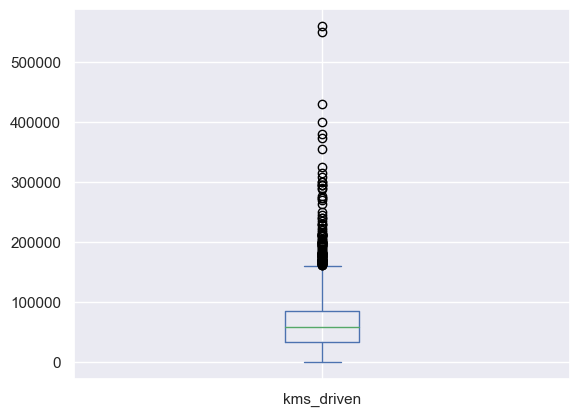

In [77]:
df['kms_driven'].plot(kind='box')

<AxesSubplot: >

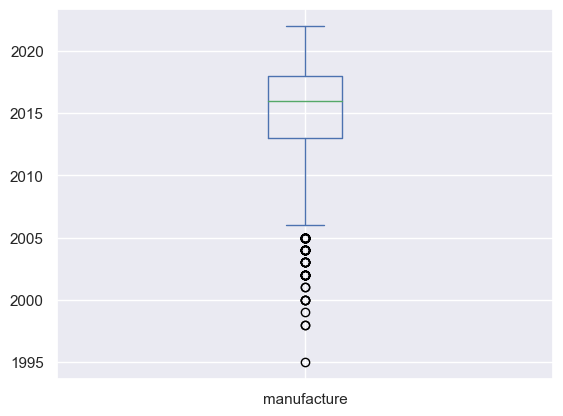

In [78]:
df['manufacture'].plot(kind='box')

<AxesSubplot: >

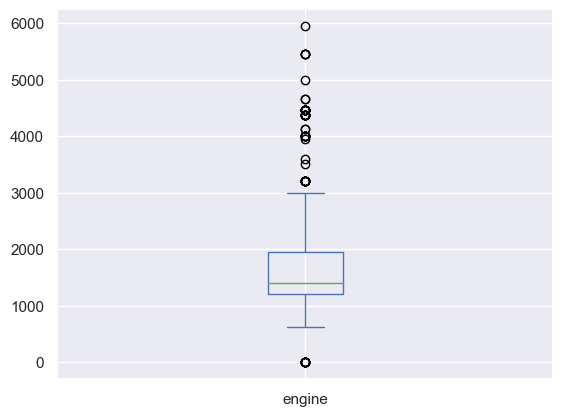

In [79]:
df['engine'].plot(kind='box')

In [80]:
def outliers(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df[col]=np.where(df[col]<lower_limit,lower_limit,(np.where(df[col]>upper_limit,upper_limit,df[col])))

In [81]:
out_col=['engine','manufacture','kms_driven']
out_col

['engine', 'manufacture', 'kms_driven']

In [82]:
for i in out_col:
    outliers(i)

Text(0.5, 1.0, 'kms_driven')

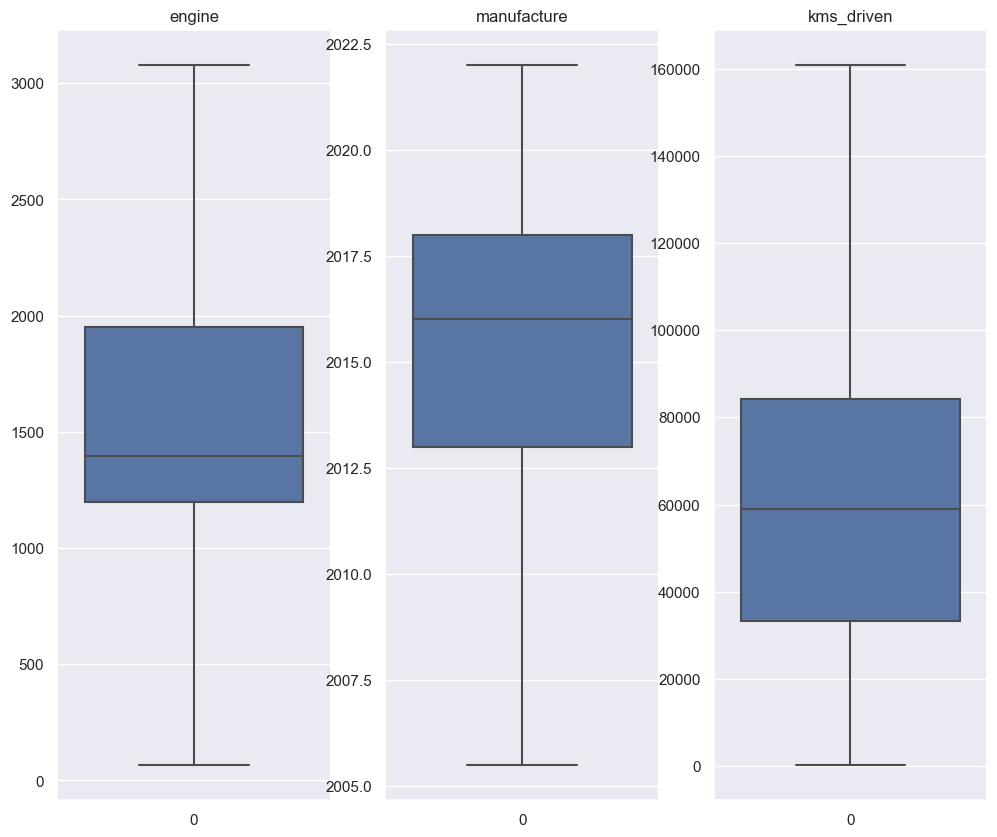

In [83]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.boxplot(df['engine'])
plt.title('engine')
plt.subplot(1,3,2)
sns.boxplot(df['manufacture'])
plt.title('manufacture')
plt.subplot(1,3,3)
sns.boxplot(df['kms_driven'])
plt.title('kms_driven')

In [84]:
df.head()

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Brand,Model,Car Price
0,86226.0,Diesel,Manual,1,2017.0,1956.0,5,Jeep,Compass,10.03
1,13248.0,Petrol,Automatic,1,2021.0,1330.0,5,Renault,Duster,12.83
2,60343.0,Petrol,Automatic,1,2016.0,2494.0,5,Toyota,Camry,16.40
3,26696.0,Petrol,Automatic,1,2018.0,1199.0,5,Honda,Jazz,7.77
4,69414.0,Petrol,Manual,1,2016.0,1199.0,5,Volkswagen,Polo,5.15


<Figure size 800x600 with 0 Axes>

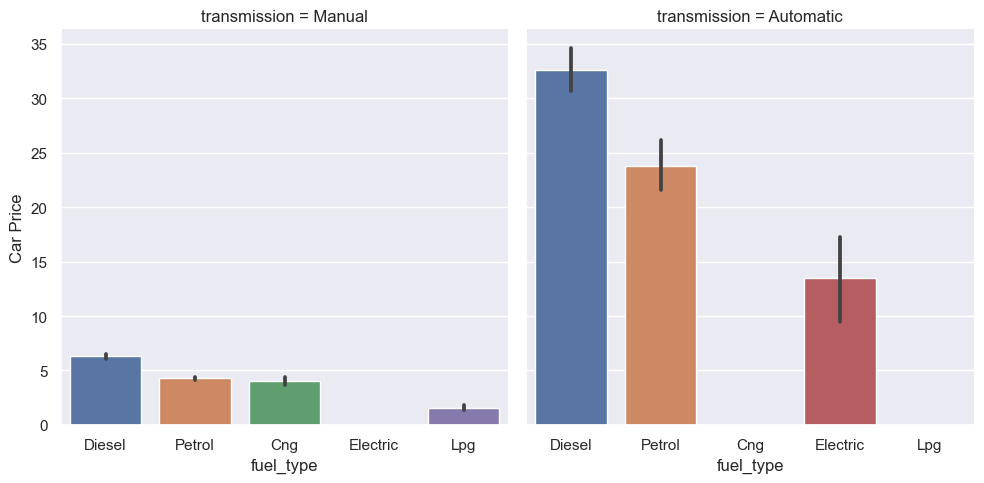

In [102]:
plt.figure(figsize=(8,6))
sns.catplot(df,x='fuel_type',y='Car Price',kind='bar',col='transmission')
plt.show()

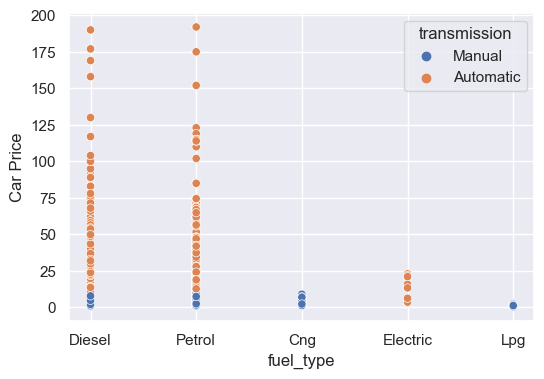

In [103]:
plt.figure(figsize=(6,4))
sns.scatterplot(df,x='fuel_type',y='Car Price',hue='transmission')
plt.show()

In [86]:
X=df.groupby('Brand')['Car Price'].max().sort_values(ascending=False).head()
X

Brand
Land             192.0
Mercedes-Benz    177.0
Audi             175.0
Porsche          175.0
Toyota           169.0
Name: Car Price, dtype: float64

In [107]:
Y=df.groupby('transmission')['Car Price'].max().sort_values(ascending=False).head()
Y

transmission
Automatic    192.0
Manual        37.5
Name: Car Price, dtype: float64

In [100]:
Z=df.groupby('ownership')['Car Price'].max().sort_values(ascending=False).head()
Z

ownership
1    192.0
2    152.0
0     57.8
3     34.9
4     21.0
Name: Car Price, dtype: float64

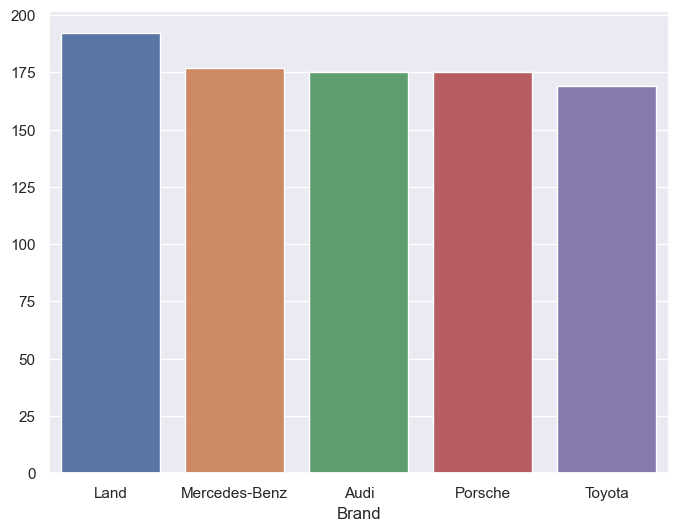

In [104]:
plt.figure(figsize=(8,6))
sns.barplot(df,x=X.index,y=X.values)
plt.show()

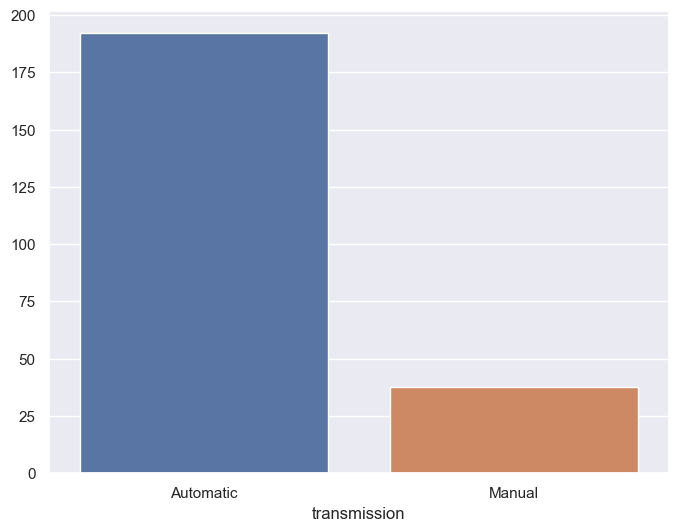

In [108]:
plt.figure(figsize=(8,6))
sns.barplot(df,x=Y.index,y=Y.values)
plt.show()

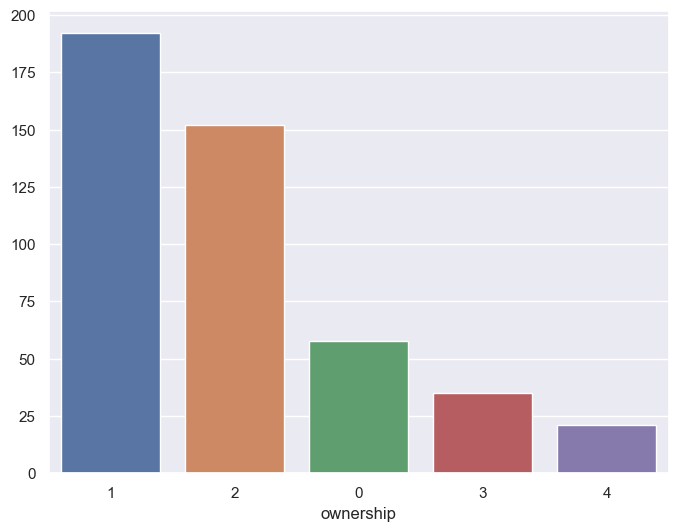

In [106]:
plt.figure(figsize=(8,6))
sns.barplot(df,x=Z.index,y=Z.values)
plt.show()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kms_driven    5512 non-null   float64
 1   fuel_type     5512 non-null   object 
 2   transmission  5512 non-null   object 
 3   ownership     5512 non-null   object 
 4   manufacture   5512 non-null   float64
 5   engine        5512 non-null   float64
 6   Seats         5512 non-null   object 
 7   Brand         5512 non-null   object 
 8   Model         5512 non-null   object 
 9   Car Price     5512 non-null   float64
dtypes: float64(4), object(6)
memory usage: 430.8+ KB


In [110]:
df['transmission'].value_counts()

Manual       3962
Automatic    1550
Name: transmission, dtype: int64

In [111]:
df['transmission']=df['transmission'].astype('category')
df['transmission']=df['transmission'].cat.codes
df['Brand']=df['Brand'].astype('category')
df['Brand']=df['Brand'].cat.codes
df['Model']=df['Model'].astype('category')
df['Model']=df['Model'].cat.codes

In [112]:
df=pd.get_dummies(data=df,columns=['fuel_type','ownership','Seats'],drop_first=True)
df.head()

,kms_driven,transmission,manufacture,engine,Brand,Model,Car Price,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8
0,86226.0,1,2017.0,1956.0,12,47,10.03,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,13248.0,0,2021.0,1330.0,26,54,12.83,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,60343.0,0,2016.0,2494.0,29,39,16.40,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,26696.0,0,2018.0,1199.0,8,99,7.77,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,69414.0,1,2016.0,1199.0,30,138,5.15,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [113]:
x=df.drop(['Car Price'],axis=1)
y=df['Car Price']

In [114]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(5512, 20)

In [115]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.686720,kms_driven
1,1.189230,transmission
2,1.714301,manufacture
3,1.073094,engine
4,1.030190,Brand
5,1.025440,Model
6,17.793124,fuel_type_Diesel
7,1.191247,fuel_type_Electric
8,1.363928,fuel_type_Lpg
9,17.833801,fuel_type_Petrol


In [116]:
df1=df.copy()

In [117]:
df1=df1.drop(columns=['ownership_1','Seats_5 '],axis=1)

In [118]:
x=df1.drop(['Car Price'],axis=1)
y=df1['Car Price']

In [119]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(5512, 18)

In [120]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.686229,kms_driven
1,1.187596,transmission
2,1.712197,manufacture
3,1.072640,engine
4,1.029187,Brand
5,1.025279,Model
6,17.793011,fuel_type_Diesel
7,1.191188,fuel_type_Electric
8,1.363885,fuel_type_Lpg
9,17.832442,fuel_type_Petrol


In [121]:
df2=df1.copy()

In [122]:
df2=df2.drop(['fuel_type_Petrol'],axis=1)

In [123]:
x=df2.drop(['Car Price'],axis=1)
y=df2['Car Price']

In [124]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(5512, 17)

In [125]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.677662,kms_driven
1,1.184133,transmission
2,1.701460,manufacture
3,1.072609,engine
4,1.028675,Brand
5,1.025050,Model
6,1.224370,fuel_type_Diesel
7,1.018889,fuel_type_Electric
8,1.018147,fuel_type_Lpg
9,1.166896,ownership_2


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [127]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Car Price   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.510
Method:                 Least Squares   F-statistic:                              270.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:28:18   Log-Likelihood:                         -18455.
No. Observations:                4409   AIC:                                  3.694e+04
Df Residuals:                    4392   BIC:                                  3.705e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
kms_driven         -9.656e-05   7.51e-06    -12.858      0.000      -0.000   -8.18e-05
transmission         -19.8243      0.577    -34.330      0.000     -20.956     -18.692
manufacture            0.0130      0.001     24.200      0.000       0.012       0.014
engine                 0.0019      0.000      4.179      0.000       0.001       0.003
Brand                  0.0104      0.030      0.350      0.727      -0.048       0.069
Model                  0.0061      0.003      1.831      0.067      -0.000       0.013
fuel_type_Diesel       6.7654      0.527     12.826      0.000       5.731       7.800
fuel_type_Electric   -13.7770      4.852     -2.840      0.005     -23.289      -4.265
fuel_type_Lpg          1.3862      3.432      0.404      0.686      -5.341       8.114
ownership_2           -3.4650      0.591     -5.864      0.000      -4.623      -2.307
ownership_3           -4.5313      1.015     -4.465      0.000      -6.521      -2.542
ownership_4           -3.0972      1.976     -1.568      0.117      -6.971       0.776
ownership_5            1.1068      5.070      0.218      0.827      -8.833      11.047
Seats_4                5.9605      1.943      3.067      0.002       2.150       9.771
Seats_6               -2.8047      2.277     -1.232      0.218      -7.268       1.659
Seats_7                0.1941      0.768      0.253      0.800      -1.311       1.699
Seats_8               -1.7378      2.454     -0.708      0.479      -6.550       3.074
==============================================================================
Omnibus:                     4647.696   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359841.848
Skew:                           5.242   Prob(JB):                         0.00
Kurtosis:                      45.998   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
df3=df2.copy()

In [129]:
df3=df3.drop(columns=['Seats_7 ','ownership_5'],axis=1)

In [130]:
x=df3.drop(['Car Price'],axis=1)
y=df3['Car Price']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [132]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Car Price   R-squared (uncentered):                   0.527
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              326.2
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:28:31   Log-Likelihood:                         -18176.
No. Observations:                4409   AIC:                                  3.638e+04
Df Residuals:                    4394   BIC:                                  3.648e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
kms_driven         -9.201e-05      7e-06    -13.136      0.000      -0.000   -7.83e-05
transmission         -19.4951      0.540    -36.135      0.000     -20.553     -18.437
manufacture            0.0126      0.001     25.208      0.000       0.012       0.014
engine                 0.0020      0.000      4.711      0.000       0.001       0.003
Brand                  0.0135      0.028      0.483      0.629      -0.041       0.068
Model                  0.0057      0.003      1.827      0.068      -0.000       0.012
fuel_type_Diesel       6.1933      0.494     12.536      0.000       5.225       7.162
fuel_type_Electric   -14.4806      4.557     -3.178      0.001     -23.415      -5.546
fuel_type_Lpg          1.3511      3.026      0.447      0.655      -4.581       7.283
ownership_2           -2.9195      0.554     -5.267      0.000      -4.006      -1.833
ownership_3           -4.2365      0.928     -4.566      0.000      -6.056      -2.417
ownership_4           -2.3702      1.869     -1.268      0.205      -6.033       1.293
Seats_4                5.7999      1.845      3.144      0.002       2.183       9.416
Seats_6               -2.8043      2.174     -1.290      0.197      -7.067       1.459
Seats_8               -1.1192      2.328     -0.481      0.631      -5.684       3.446
==============================================================================
Omnibus:                     4643.470   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388304.730
Skew:                           5.198   Prob(JB):                         0.00
Kurtosis:                      47.784   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
df4=df3.copy()

In [134]:
df4=df4.drop(columns=['Seats_8 '],axis=1)

In [135]:
x=df4.drop(['Car Price'],axis=1)
y=df4['Car Price']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [137]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Car Price   R-squared (uncentered):                   0.527
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              349.5
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:28:42   Log-Likelihood:                         -18176.
No. Observations:                4409   AIC:                                  3.638e+04
Df Residuals:                    4395   BIC:                                  3.647e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
kms_driven         -9.206e-05      7e-06    -13.144      0.000      -0.000   -7.83e-05
transmission         -19.5007      0.539    -36.156      0.000     -20.558     -18.443
manufacture            0.0126      0.001     25.221      0.000       0.012       0.014
engine                 0.0020      0.000      4.698      0.000       0.001       0.003
Brand                  0.0135      0.028      0.483      0.629      -0.041       0.069
Model                  0.0057      0.003      1.831      0.067      -0.000       0.012
fuel_type_Diesel       6.1904      0.494     12.532      0.000       5.222       7.159
fuel_type_Electric   -14.5807      4.552     -3.203      0.001     -23.505      -5.656
fuel_type_Lpg          1.2739      3.021      0.422      0.673      -4.649       7.197
ownership_2           -2.9221      0.554     -5.272      0.000      -4.009      -1.836
ownership_3           -4.2477      0.928     -4.580      0.000      -6.066      -2.429
ownership_4           -2.3767      1.868     -1.272      0.203      -6.040       1.286
Seats_4                5.8117      1.844      3.151      0.002       2.196       9.428
Seats_6               -2.7946      2.174     -1.285      0.199      -7.057       1.468
==============================================================================
Omnibus:                     4643.564   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388316.333
Skew:                           5.198   Prob(JB):                         0.00
Kurtosis:                      47.785   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [139]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=300)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300)

In [140]:
train_pred1=rf.predict(x_train)
test_pred1=rf.predict(x_test)

In [141]:
print('Training Accuracy is: ',r2_score(y_train,train_pred1))
print('Test Accuracy is: ',r2_score(y_test,test_pred1))

Training Accuracy is:  0.9827144778698642
Test Accuracy is:  0.8109585402663773


In [143]:
cvs=cross_val_score(rf,x_train,y_train,cv=10)
print('10 accuracy is: ',cvs)
print('Avg accuracy is: ',cvs.mean())
print('Max accuracy is: ',cvs.max())

10 accuracy is:  [0.92199248 0.88396727 0.92493076 0.80886328 0.83713761 0.9013585
 0.93292335 0.84435625 0.72231178 0.88986982]
Avg accuracy is:  0.8667711093631933
Max accuracy is:  0.9329233450074482
